<a href="https://colab.research.google.com/github/nazarcoder123/LSTM-STACK-Apple-Price-Prediction/blob/main/LSTM(STACK)stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
### Data Collection
import pandas_datareader as pdr
key="f474182cc5c8d41ce243cfb62e27b2aa306d00c"

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

<ipython-input-3-08157bf6935e>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('AAPL.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-11-13 00:00:00+00:00,192.23,197.18,191.45,191.63,46882936,46.124663,47.312392,45.937506,45.980696,187531744,0.0,1.0
1,AAPL,2018-11-14 00:00:00+00:00,186.80,194.48,185.93,193.90,60800957,44.821761,46.664540,44.613008,46.525371,243203828,0.0,1.0
2,AAPL,2018-11-15 00:00:00+00:00,191.41,191.97,186.90,188.39,46478801,45.927908,46.062277,44.845755,45.203273,185915204,0.0,1.0
3,AAPL,2018-11-16 00:00:00+00:00,193.53,194.97,189.46,190.50,36928253,46.436592,46.782113,45.460015,45.709558,147713012,0.0,1.0
4,AAPL,2018-11-19 00:00:00+00:00,185.86,190.70,184.99,190.00,41920872,44.596212,45.757547,44.387460,45.589585,167683488,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2023-11-06 00:00:00+00:00,179.23,179.430,176.21,176.38,63841310,178.999529,179.199271,175.983412,176.153193,63841310,0.00,1.0
1253,AAPL,2023-11-07 00:00:00+00:00,181.82,182.440,178.97,179.18,70529966,181.586198,182.205401,178.739863,178.949593,70529966,0.00,1.0
1254,AAPL,2023-11-08 00:00:00+00:00,182.89,183.450,181.59,182.35,49340282,182.654822,183.214102,181.356494,182.115517,49340282,0.00,1.0
1255,AAPL,2023-11-09 00:00:00+00:00,182.41,184.120,181.81,182.96,53763540,182.175439,183.883240,181.576211,182.724732,53763540,0.00,1.0
1256,AAPL,2023-11-10 00:00:00+00:00,186.40,186.565,183.53,183.97,66177922,186.400000,186.565000,183.530000,183.970000,66177922,0.24,1.0


In [9]:
df1=df.reset_index()['close']

In [10]:
df1

0       192.23
1       186.80
2       191.41
3       193.53
4       185.86
         ...  
1252    179.23
1253    181.82
1254    182.89
1255    182.41
1256    186.40
Name: close, Length: 1257, dtype: float64

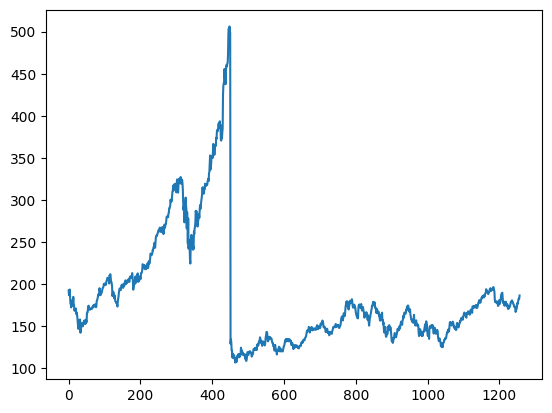

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [13]:
import numpy as np

In [14]:
df1

0       192.23
1       186.80
2       191.41
3       193.53
4       185.86
         ...  
1252    179.23
1253    181.82
1254    182.89
1255    182.41
1256    186.40
Name: close, Length: 1257, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
print(df1)

[[0.21387602]
 [0.20027552]
 [0.21182217]
 ...
 [0.19048215]
 [0.1892799 ]
 [0.19927364]]


In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(817, 440)

In [19]:
train_data

array([[2.13876018e-01],
       [2.00275517e-01],
       [2.11822167e-01],
       [2.17132123e-01],
       [1.97921102e-01],
       [1.75679399e-01],
       [1.75178460e-01],
       [1.63932373e-01],
       [1.69768316e-01],
       [1.68816531e-01],
       [1.85597996e-01],
       [1.82116468e-01],
       [1.79686913e-01],
       [1.95316218e-01],
       [1.74953037e-01],
       [1.70018785e-01],
       [1.54414527e-01],
       [1.57194740e-01],
       [1.54765185e-01],
       [1.55942392e-01],
       [1.60576080e-01],
       [1.46875391e-01],
       [1.43018159e-01],
       [1.48353162e-01],
       [1.35378835e-01],
       [1.25209768e-01],
       [1.09931121e-01],
       [1.00162805e-01],
       [1.26061365e-01],
       [1.23506575e-01],
       [1.23706951e-01],
       [1.27489042e-01],
       [1.27939887e-01],
       [8.85410144e-02],
       [1.03744521e-01],
       [1.02917971e-01],
       [1.09981215e-01],
       [1.16393237e-01],
       [1.17620539e-01],
       [1.13838447e-01],


In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 11s 346ms/step - loss: 0.0391 - val_loss: 7.3344e-04
Epoch 2/100
12/12 [==============================] - 2s 203ms/step - loss: 0.0128 - val_loss: 0.0017
Epoch 3/100
12/12 [==============================] - 2s 152ms/step - loss: 0.0098 - val_loss: 3.1896e-04
Epoch 4/100
12/12 [==============================] - 2s 139ms/step - loss: 0.0086 - val_loss: 4.4521e-04
Epoch 5/100
12/12 [==============================] - 2s 150ms/step - loss: 0.0076 - val_loss: 2.4167e-04
Epoch 6/100
12/12 [==============================] - 1s 107ms/step - loss: 0.0065 - val_loss: 4.8253e-04
Epoch 7/100
12/12 [==============================] - 1s 106ms/step - loss: 0.0085 - val_loss: 0.0012
Epoch 8/100
12/12 [==============================] - 1s 107ms/step - loss: 0.0059 - val_loss: 4.0639e-04
Epoch 9/100
12/12 [==============================] - 1s 107ms/step - loss: 0.0052 - val_loss: 0.0012
Epoch 10/100
12/12 [==============================] - 1s 105ms/ste

In [30]:
import tensorflow as tf

In [31]:
tf.__version__

'2.14.0'

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 20ms/step


In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

222.12888301505228

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

160.35262672705247

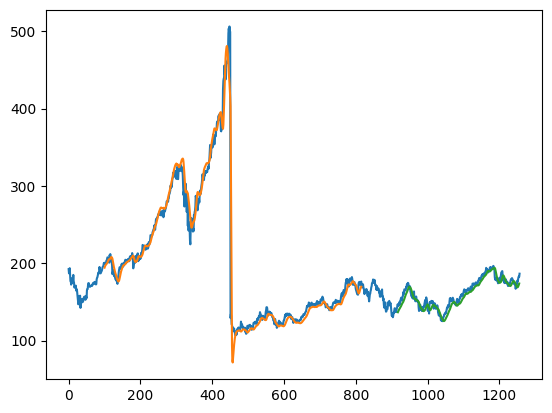

In [36]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()